# 異常検知ライブラリ　PyOD

【ライブラリのインポート】PyODライブラリは、各手法毎にインポートする。

In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'MS Gothic'
from pyod.utils.data import generate_data, get_outliers_inliers
# import PyOD library models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.pca import PCA

【人工データの生成】変数の数、異常データの出現割合（ここではデフォルト0.1）を指定して、分析用の人工データ（観測データ、正常/異常データ）を生成することができる。

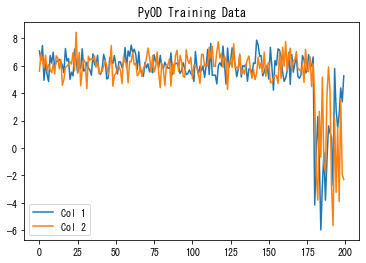

In [2]:
# generate random data with two features
X_train,X_test,Y_train,Y_test=generate_data(n_train=200,n_test=100,n_features=2,behaviour='new')

# plot training data
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(X_train[:,0], label='Col 1')
ax1.plot(X_train[:,1], label='Col 2')
ax1.set_title('PyOD Training Data')
ax1.legend()
plt.show()

【手法の記述】分析に用いる手法を辞書型変数として記述する。

In [3]:
# Define eight outlier detection tools to be compared
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
classifiers = {
    'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor(CBLOF)': CBLOF(contamination=outliers_fraction,check_estimator=False,random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
}

【各手法のデータへの当てはめと異常判定】ここでは辞書リストの要素についてのループを組んでいる。

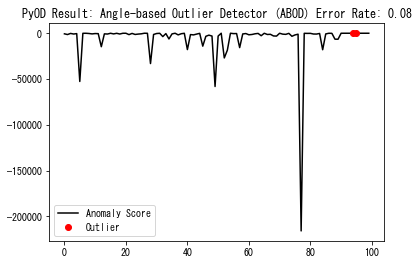

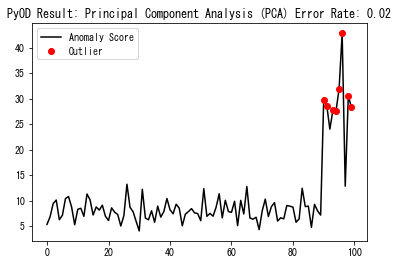

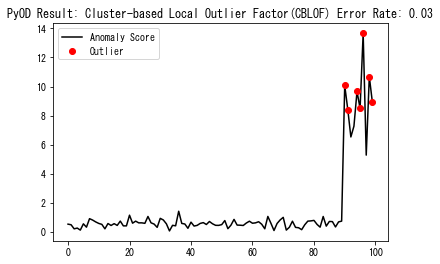

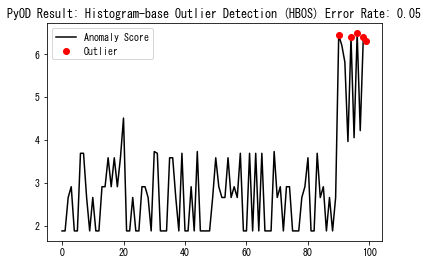

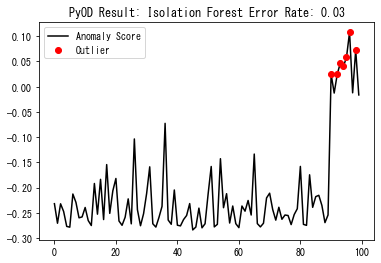

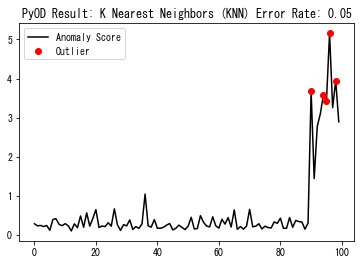

In [4]:
# Loop for outlier detection tools
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # fit the dataset to the model
    clf.fit(X_train)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X_test)
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_test)
    # prediciton error rate
    y_ErrRate = (y_pred != Y_test).sum() / len(Y_test)
    # plot scores_pred
    x = np.arange(100)
    y1 = scores_pred
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x,y1, 'k-', label='Anomaly Score')
    ax1.plot(x[y_pred==1], y1[y_pred==1],'ro', label='Outlier')
    ax1.set_title('PyOD Result: ' +clf_name + ' Error Rate: '+str(round(y_ErrRate,3)))
    ax1.legend()
    plt.show()

前回のプログラム事例の発展型として、PyODライブラリ付属のデモ描画システムを利用することができる。まず以下の２つのライブラリのインポートを追加する。

In [5]:
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

そして異常検知手法のループの部分を以下に置き換える。


On Training Data:
Angle-based Outlier Detector (ABOD) ROC:0.9936, precision @ rank n:0.85

On Test Data:
Angle-based Outlier Detector (ABOD) ROC:0.9944, precision @ rank n:0.9


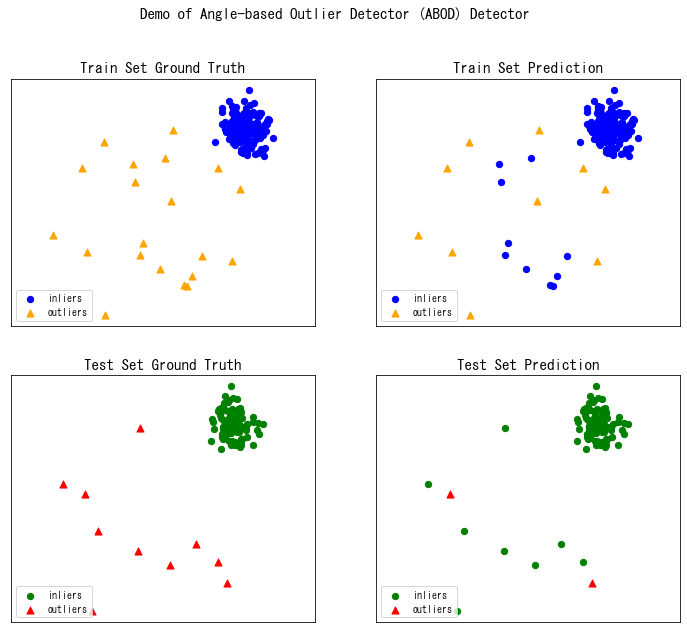


On Training Data:
Principal Component Analysis (PCA) ROC:0.9669, precision @ rank n:0.85

On Test Data:
Principal Component Analysis (PCA) ROC:0.9989, precision @ rank n:0.9


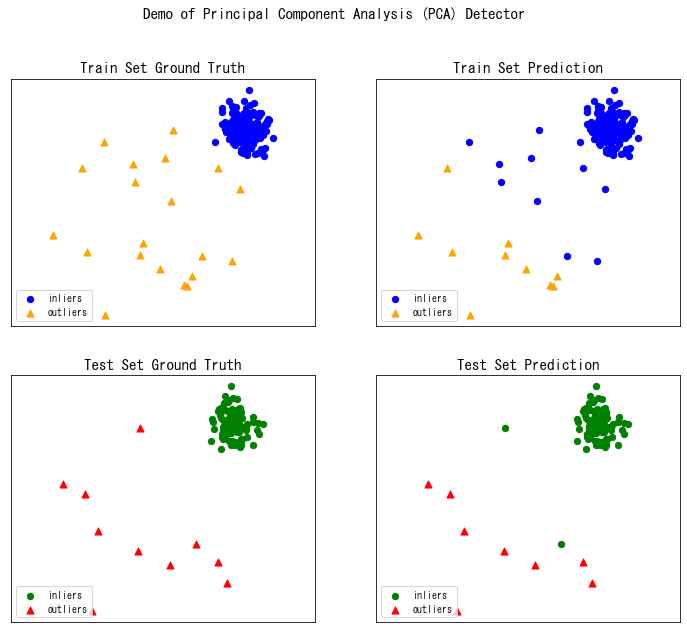


On Training Data:
Cluster-based Local Outlier Factor(CBLOF) ROC:1.0, precision @ rank n:1.0

On Test Data:
Cluster-based Local Outlier Factor(CBLOF) ROC:1.0, precision @ rank n:1.0


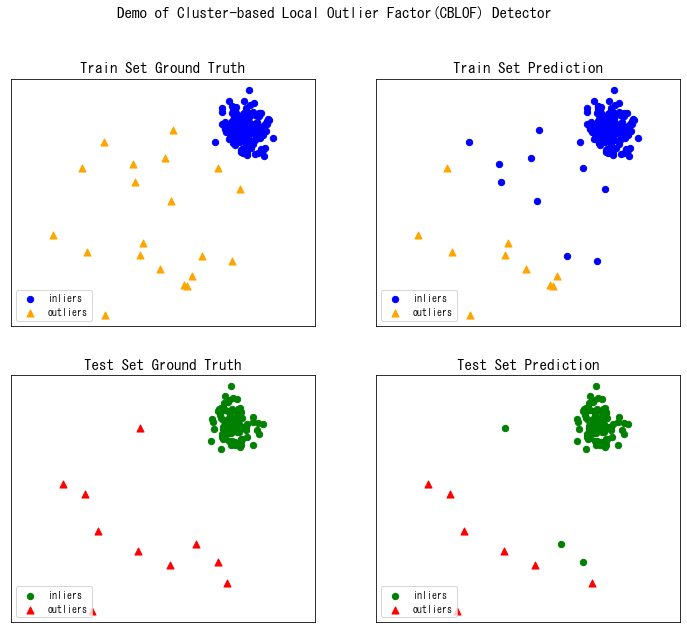


On Training Data:
Histogram-base Outlier Detection (HBOS) ROC:0.9953, precision @ rank n:0.8947

On Test Data:
Histogram-base Outlier Detection (HBOS) ROC:0.9967, precision @ rank n:0.9


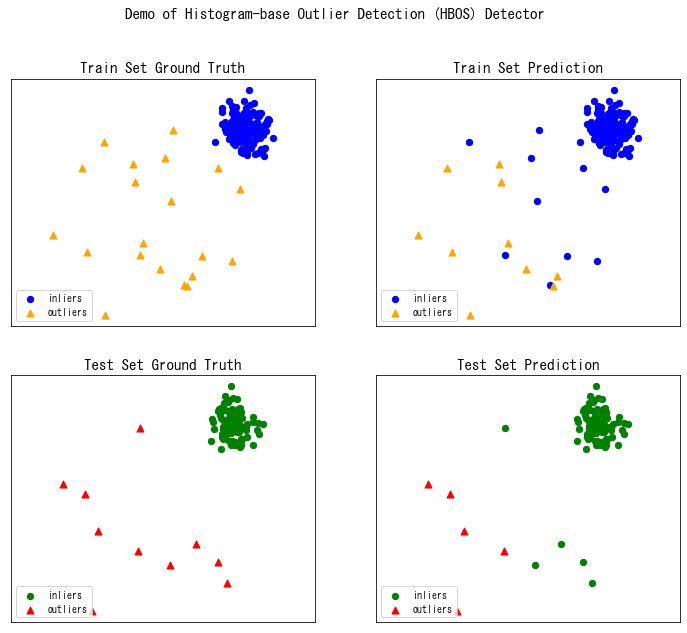


On Training Data:
Isolation Forest ROC:0.9986, precision @ rank n:0.95

On Test Data:
Isolation Forest ROC:1.0, precision @ rank n:1.0


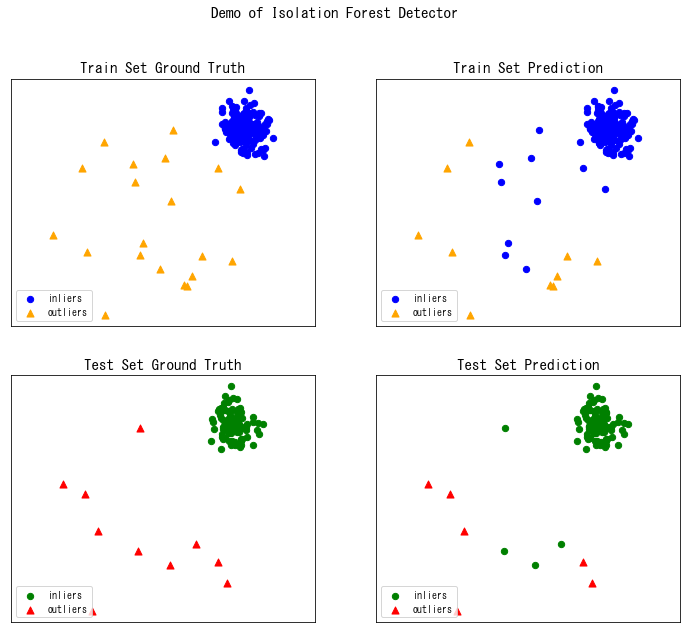


On Training Data:
K Nearest Neighbors (KNN) ROC:1.0, precision @ rank n:1.0

On Test Data:
K Nearest Neighbors (KNN) ROC:1.0, precision @ rank n:1.0


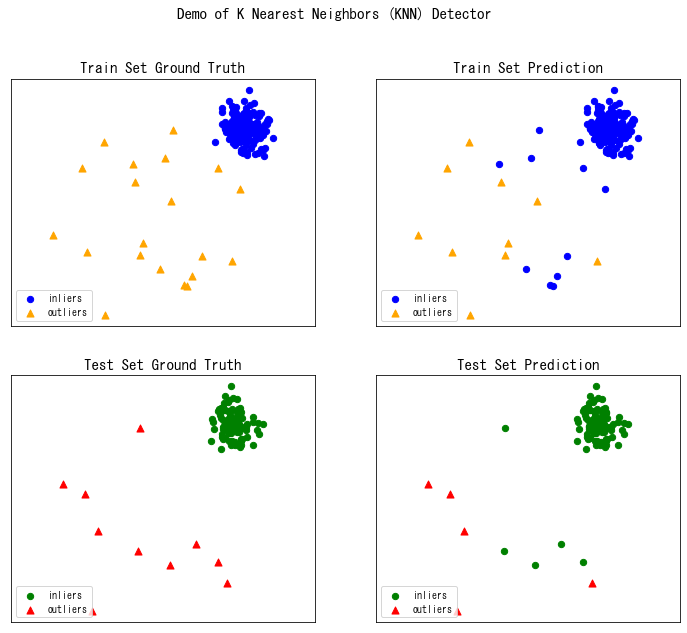

In [6]:
# Loop for outlier detection tools
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # train kNN detector
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    Y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    Y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    Y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    Y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, Y_train, Y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, Y_test, Y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, Y_train, X_test, Y_test, Y_train_pred,
              Y_test_pred, show_figure=True, save_figure=True)